In [2]:
import pandas as pd

import torch
from timm.data.mixup import Mixup
from iris.data import LandMarkDataset
from torch.utils.data import DataLoader

import torchvision
from torchvision.transforms import transforms

import numpy as np
from matplotlib import pyplot as plt

import albumentations as A
from albumentations.pytorch import ToTensorV2

In [3]:
annotations_file = pd.read_csv("../img_metadata_train_dev.csv")

lm_dataset = LandMarkDataset("../dataset/train2", annotations_file)
loader = DataLoader(lm_dataset, batch_size=8, shuffle=True)
features, labels = next(iter(loader))

<Figure size 1440x720 with 0 Axes>

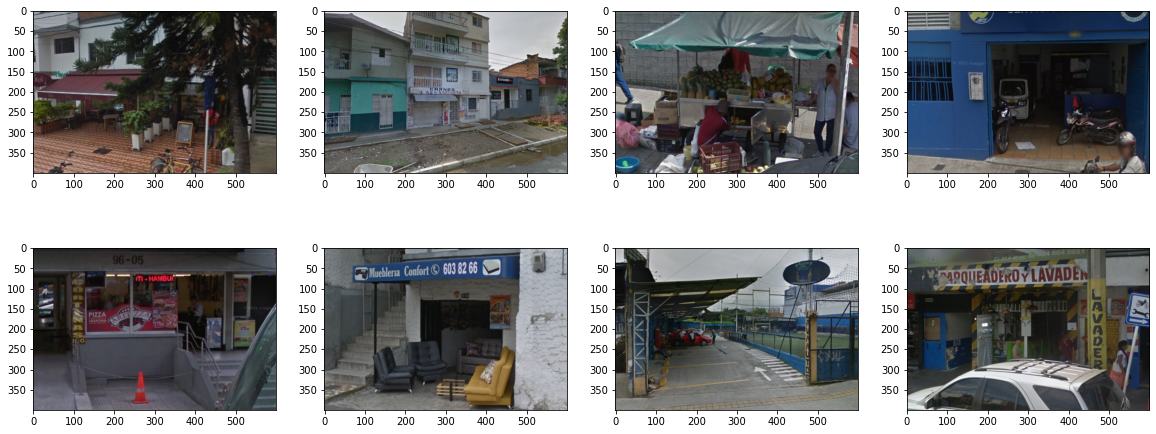

In [4]:
plt.figure(figsize=(20, 10))
cols = 4
rows = int(len(features) / cols + 1)
figure, ax = plt.subplots(2, 4, figsize=(20, 8))
for i, image in enumerate(features):
    image = transforms.ToPILImage()(image).convert("RGB")
    ax.ravel()[i].imshow(image)

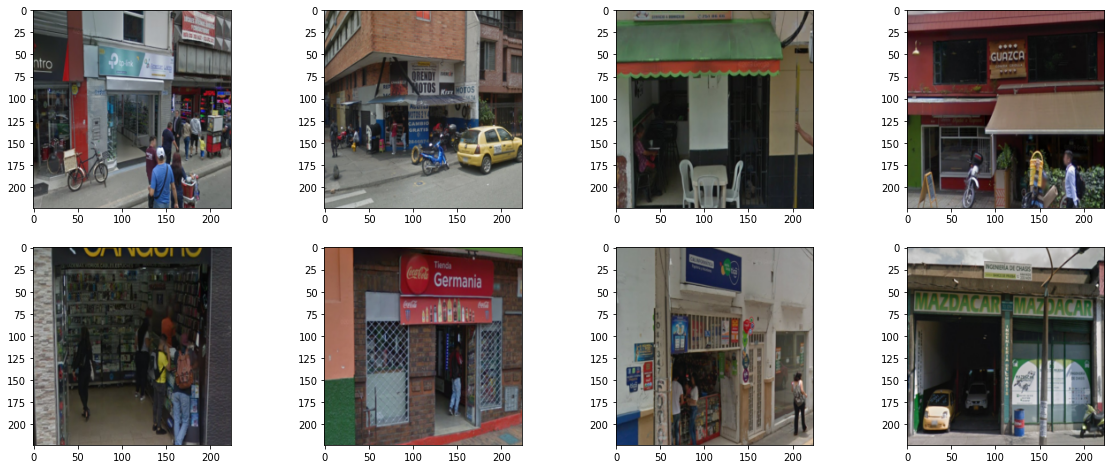

In [6]:
from torchvision.transforms import Compose
train_trans_tv = transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),
        ]
    )

lm_dataset_at = LandMarkDataset("../dataset/train2", annotations_file, transform=train_trans_tv)
loader_at = DataLoader(lm_dataset_at, batch_size=8, shuffle=True)
features_tv, labels = next(iter(loader_at))

figure, ax = plt.subplots(2, 4, figsize=(20, 8))
for i, image in enumerate(features_tv):
    image = image * 0.5 + 0.5
    image = transforms.ToPILImage()(image).convert("RGB")
    ax.ravel()[i].imshow(image)

In [7]:
# https://albumentations-demo.herokuapp.com/

train_transform = A.Compose(
    [
        A.Resize(224, 224),
        A.CenterCrop(height=224, width=224, p=0.2),
        A.CoarseDropout(always_apply=False, p=0.1, max_holes=5, max_height=40, max_width=40, min_holes=1, min_height=8, min_width=8),
        A.RandomBrightnessContrast(p=0.2),
        A.Flip(always_apply=False, p=5.0),
        A.Normalize(
            mean=[0.5, 0.5, 0.5],
            std=[0.5, 0.5, 0.5],
        ),
        ToTensorV2(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),       
    ]
)

lm_dataset_a = LandMarkDataset("../dataset/train2", annotations_file, transform=train_transform)
loader_a = DataLoader(lm_dataset_a, batch_size=8, shuffle=True)

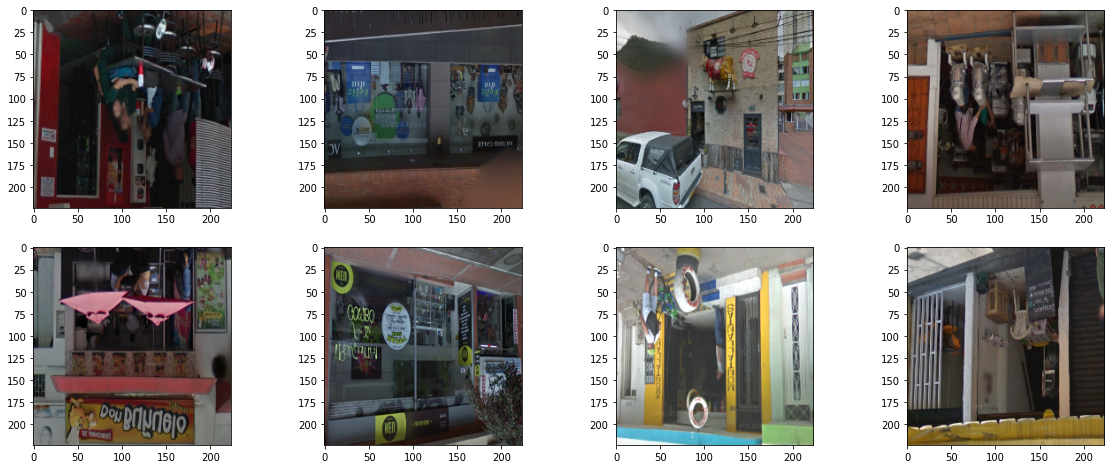

In [8]:
features_a, labels = next(iter(loader_a))
figure, ax = plt.subplots(2,4, figsize=(20, 8))
for i, image in enumerate(features_a):
    image = image * 0.5 + 0.5
    image = transforms.ToPILImage()(image).convert("RGB")
    ax.ravel()[i].imshow(image)